In [9]:
import matplotlib.pyplot as plt
from matplotlib import colormaps as cmaps
import pandas as pd
import numpy as np

In [10]:
scan_results={
    "local-ssd":"fio_scan_results/local-dir_all_results.parquet",
    "local-hdd":"fio_scan_results/win-hdd_all_results.parquet",
    "samba-share-with-ssd-cache":"fio_scan_results/truenas-home_all_results.parquet",
    "samba-share-w/o-ssd-cache":"fio_scan_results/truenas-home-no-cache-vdev_all_results.parquet",
    "samba-share-ssd":"fio_scan_results/truenas-ssd_all_results.parquet",
}

Text(0, 0.5, 'BW [MB/s]')

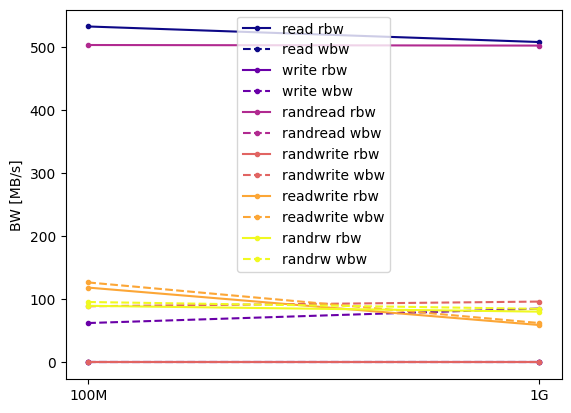

In [11]:
name = "local-ssd"

df = pd.read_parquet(scan_results[name])

f,ax = plt.subplots()
colors = cmaps["plasma"](np.linspace(0,1,6))
# mask = df["size"]=="100M"
# x = "bs"
mask = df["bs"]=="4M"
x = "size"
i=0

for mode in df[mask]["rw"].unique():
    df_ = df[mask &(df["rw"]==mode)]
    ax.plot(df_[x],df_['read_bw']/1024.,marker=".",label=f'{mode} rbw',ls="-",color=colors[i])
    ax.plot(df_[x],df_['write_bw']/1024.,marker=".",label=f'{mode} wbw',ls="--",color=colors[i])
    i+=1

ax.legend()

ax.set_ylabel("BW [MB/s]")


Text(0, 0.5, 'BW [MB/s]')

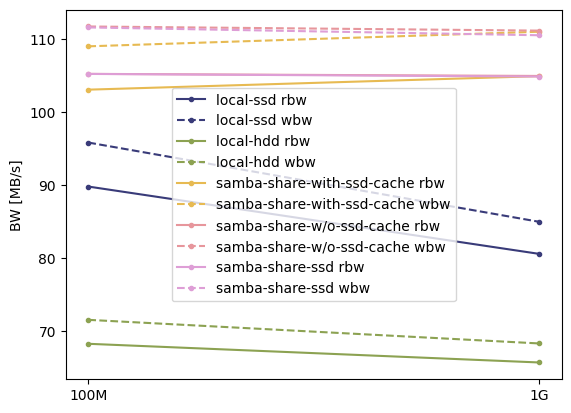

In [12]:
dfs = {name:pd.read_parquet(scan_results[name]) for name in scan_results.keys()}

f,ax = plt.subplots()
colors = cmaps["tab20b"](np.linspace(0,1,len(dfs)))

x = "size"
i=-1
for name,df in dfs.items():
    mask = (df["bs"]=="4M")&(df["rw"]=="randrw")
    i+=1
    df_ = df[mask]
    ax.plot(df_[x],df_['read_bw']/1024.,marker=".",label=f'{name} rbw',ls="-",color=colors[i])
    ax.plot(df_[x],df_['write_bw']/1024.,marker=".",label=f'{name} wbw',ls="--",color=colors[i])

ax.legend()

ax.set_ylabel("BW [MB/s]")
# ax.set_ylim(0,125)